https://medium.com/@nachiketadave/convolutional-neural-networks-with-tensorflow-2-0-d13f3a3148aa

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as img
from os import listdir
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Load Images

In [2]:
from PIL import Image

dog_img = []
cat_img = []
dog_add = '..\\dat\\cats_and_dogs\\training_set\\dogs'
cat_add = '..\\dat\\cats_and_dogs\\training_set\\cats'
add = [dog_add, cat_add]
max_count = 250
target_size = [256, 256]
for i in add:
    count = 1
    for filename in listdir(i):
        print(".", end="")
        image_data = img.imread(i + '\\' + filename)

        original_image = Image.fromarray(np.uint8(image_data))
        resized_image = original_image.resize(target_size)        
        resized_image = np.array(resized_image)

        if i == dog_add:
            dog_img.append(resized_image)
        else:
            cat_img.append(resized_image)

        count += 1
        if count > max_count:
            break

    print()

#creating labels for images
img_labels = [0]*len(dog_img) + [1]*len(cat_img)
all_img = dog_img + cat_img
labels = {0:"Dog" , 1:"Cat"}

..........................................................................................................................................................................................................................................................
..........................................................................................................................................................................................................................................................


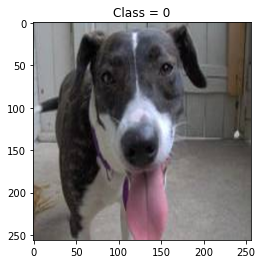

In [3]:
# show one of the images of class 0
index = 6
_, ax = plt.subplots()
ax.imshow(np.uint8(all_img[index]))
plt.title("Class = " + str(np.squeeze(img_labels[index])))
plt.show()

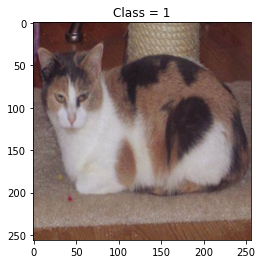

In [4]:
# show one of the images of class 1
index = len(cat_img) + 100
_, ax = plt.subplots()
ax.imshow(np.uint8(all_img[index]))
plt.title("Class = " + str(np.squeeze(img_labels[index])))
plt.show()

#### Creating Training and Test Sets

In [5]:
X_train_0, X_test_0, y_train, y_test = train_test_split(
    all_img[:], img_labels[:], test_size=0.20)

#converting X_test and X_train to numpy array (currently they are list)
X_train_0 = np.asarray(X_train_0)
y_train = np.asarray(y_train)
X_test_0 = np.asarray(X_test_0)
y_test = np.asarray(y_test)

print("X_train_0 shape:" + str(X_train_0.shape))
print("y_train shape:" + str(y_train.shape))
print("X_test_0 shape:" + str(X_test_0.shape))
print("y_test shape:" + str(y_test.shape))

import tf_utils as utils
Y_train = utils.convert_to_one_hot(np.uint(y_train), 2).T
Y_test = utils.convert_to_one_hot(np.uint(y_test), 2).T

X_train = X_train_0/255.
X_test = X_test_0/255.

print("Y_train shape:" + str(Y_train.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train_0 shape:(400, 256, 256, 3)
y_train shape:(400,)
X_test_0 shape:(100, 256, 256, 3)
y_test shape:(100,)
Y_train shape:(400, 2)
Y_test shape:(100, 2)


#### Initiating Model

In [6]:
print(tf.__version__)
#tf.compat.v1.disable_eager_execution()

AlexNet_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96,(11,11),strides=4,activation='relu',data_format='channels_last',input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D((3,3),strides=2),
    tf.keras.layers.Conv2D(256,(5,5),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D((3,3),strides=2),
    tf.keras.layers.Conv2D(384,(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D((3,3),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(9216,activation='relu'),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

my_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8,(4,4),padding='same',activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D((8,8),strides=8),
    tf.keras.layers.Conv2D(16,(2,2),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D((4,4),strides=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2,activation='softmax')
])

model = AlexNet_model

2.3.0


#### Compiling the Model

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'])

#### Saving the Model

In [8]:
model_path = '..\\models\\shallowdeeps'
model_dir = os.path.dirname(model_path)
model_callback = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=0)

#### Training the Model

In [ ]:
fitting = model.fit(
    X_train, Y_train, epochs=25, validation_split=0.25,
    shuffle=True, use_multiprocessing=True, callbacks=[model_callback])

Epoch 1/25
 8/10 [=======================>......] - ETA: 6s - loss: 0.6933 - accuracy: 0.5312

#### Evaluating the Model

In [ ]:
model.evaluate(X_test, Y_test, use_multiprocessing=True)

#### Plotting Training and Validation loss per epoch

In [ ]:
import matplotlib.pyplot as plt

val_loss = fitting.history['val_loss']
loss = fitting.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)
plt.title("Training Loss")
plt.show()
plt.plot(epochs,val_loss,'r')
plt.title("Validation Loss")
plt.show()

#### Load Pre-Trained weights

In [ ]:
model.load_weights(model_path)

#### Use Trained Model to Perdict

In [ ]:
pred = model.predict(X_test) 
pred = np.argmax(pred, axis=1)
#label = np.argmax(y_test, axis=0)[:5] 

print(pred) 
print(y_test)

accuracy = np.sum(pred == y_test)/len(y_test)
print("Accuracy:", accuracy)